In [ ]:
#from google.colab import drive
#drive.mount("/gdrive")

Mounted at /gdrive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Geetesh\Videos\Desktop\project\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.shape

(1460, 81)

In [6]:
#Finding the Missing Value:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
miss_value=[col for col in df.columns if(df[col].isnull().sum()>1)]
print(miss_value)
print(len(miss_value))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
18


In [8]:
for col in miss_value:
  print(col,round(df[col].isnull().mean(),5))

LotFrontage 0.1774
Alley 0.93767
MasVnrType 0.00548
MasVnrArea 0.00548
BsmtQual 0.02534
BsmtCond 0.02534
BsmtExposure 0.02603
BsmtFinType1 0.02534
BsmtFinType2 0.02603
FireplaceQu 0.4726
GarageType 0.05548
GarageYrBlt 0.05548
GarageFinish 0.05548
GarageQual 0.05548
GarageCond 0.05548
PoolQC 0.99521
Fence 0.80753
MiscFeature 0.96301


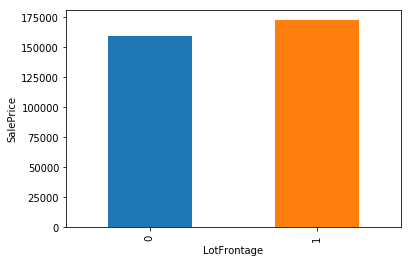

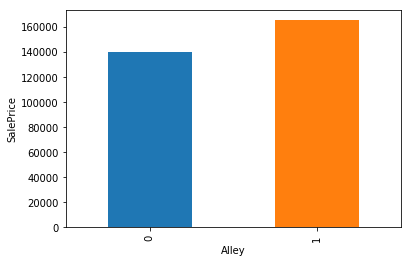

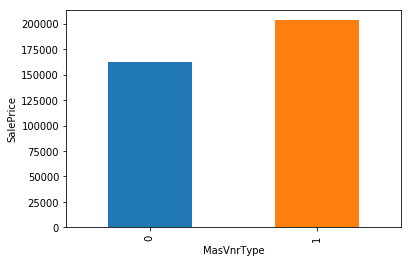

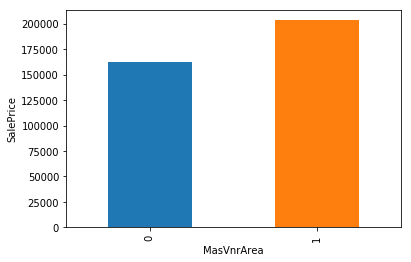

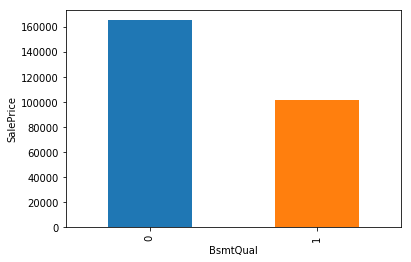

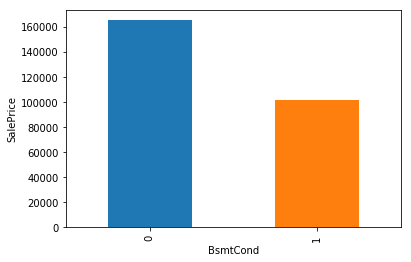

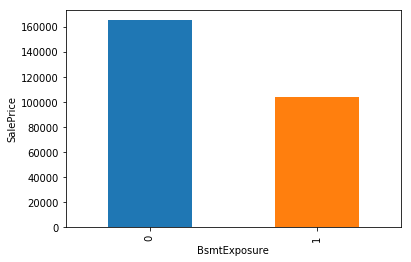

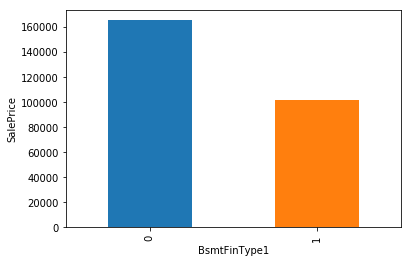

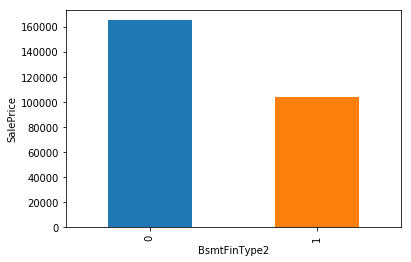

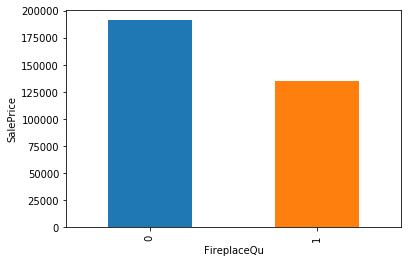

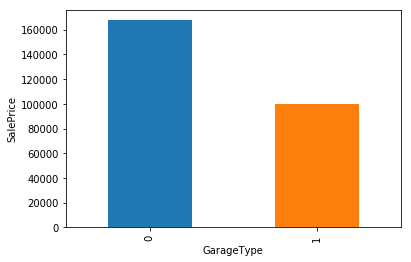

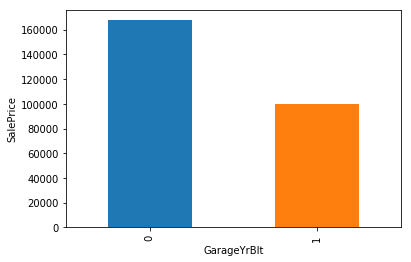

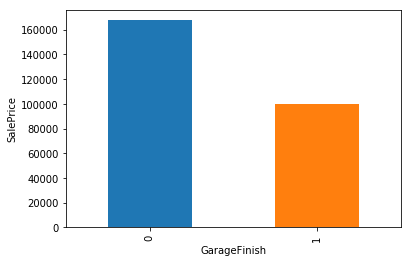

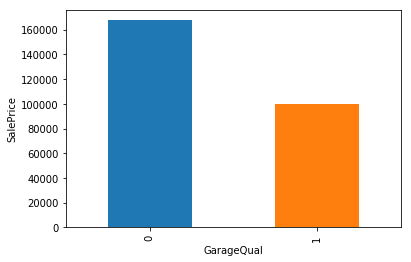

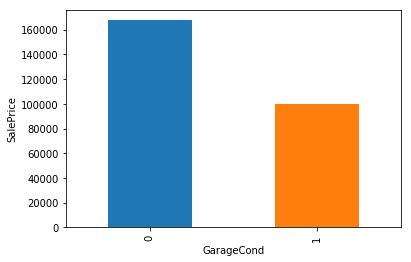

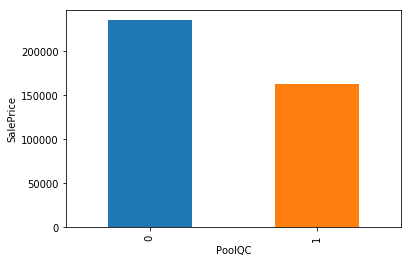

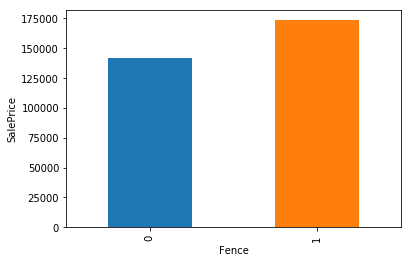

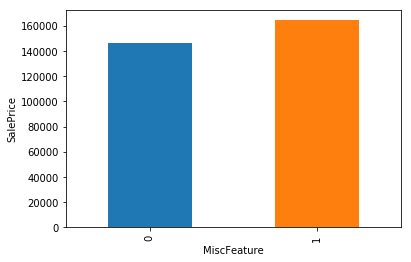

In [9]:
#Viewing wherether the Missing value have any impact on the SalePrice
for col in miss_value:
  data=df.copy()
  data[col] = np.where(data[col].isnull(),1,0)
  data.groupby(col)["SalePrice"].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel("SalePrice")
  plt.show()

In [10]:
# Finding the Numerical Feature
numerical_feature=[]
for col in df.columns:
  if(df[col].dtypes!="O"):
    numerical_feature.append(col)
print(numerical_feature)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
year_value=[col for col in numerical_feature if "Yr" in col or "Year" in col]
print(year_value)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


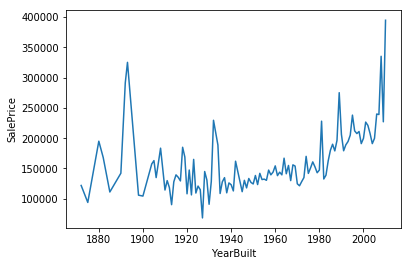

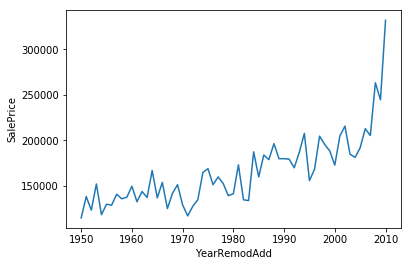

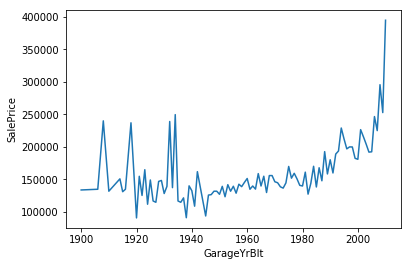

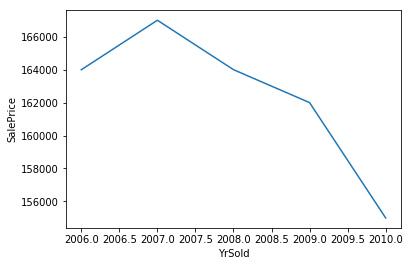

In [12]:
for col in year_value:
  df.groupby(col)["SalePrice"].median().plot()
  plt.xlabel(col)
  plt.ylabel("SalePrice")
  plt.show()

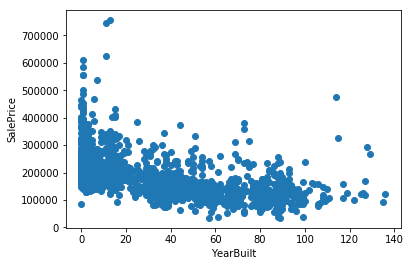

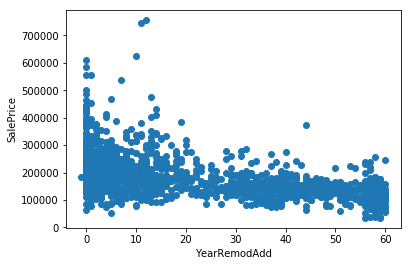

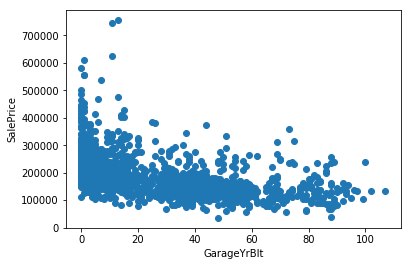

In [13]:
for col in year_value:
  data=df.copy()
  if(col!="YrSold"):
    data[col]=data["YrSold"]-data[col]
    plt.scatter(data[col],data["SalePrice"])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [14]:
for col in numerical_feature:
  print(col, len(df[col].unique()))

Id 1460
MSSubClass 15
LotFrontage 111
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 328
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 98
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


In [15]:
discrete_value=[col for col in numerical_feature if(len(df[col].unique())<25 and col not in year_value)]
print(discrete_value)
print(len(discrete_value))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
17


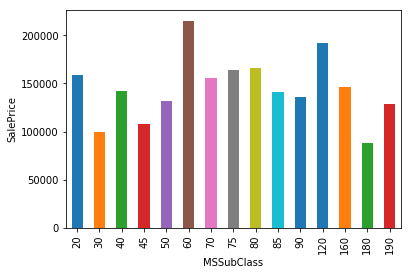

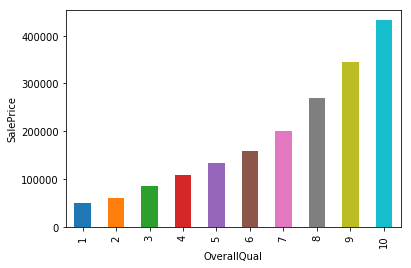

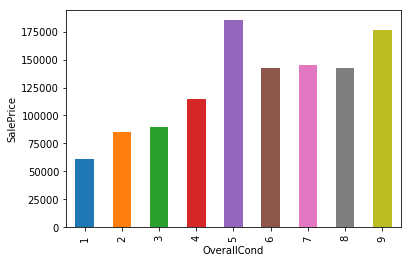

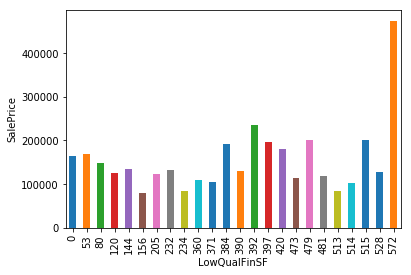

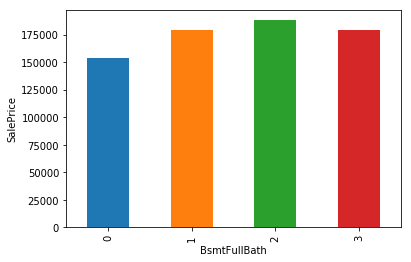

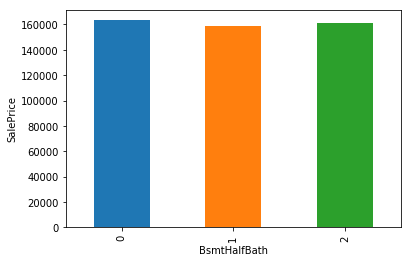

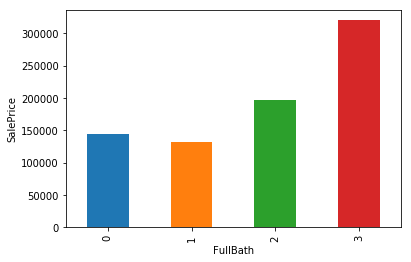

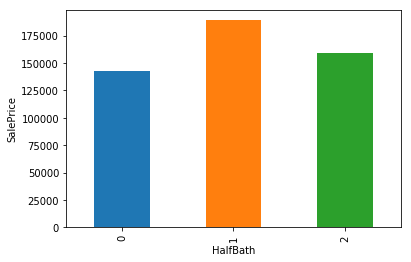

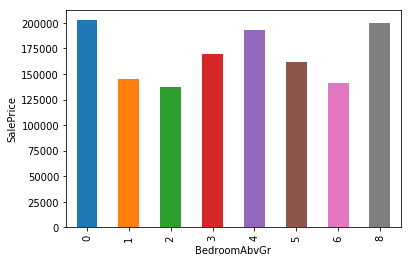

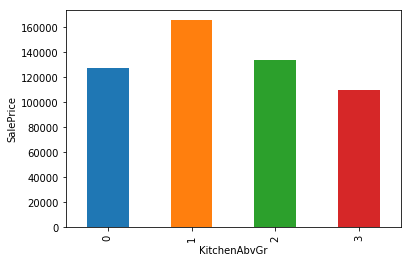

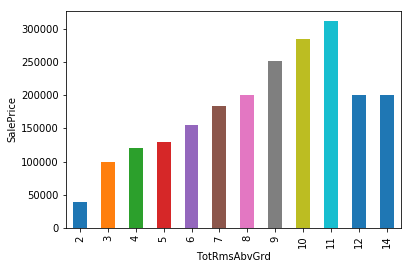

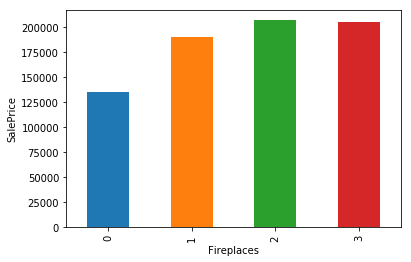

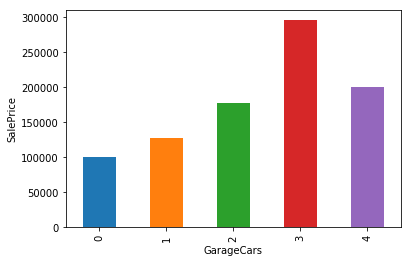

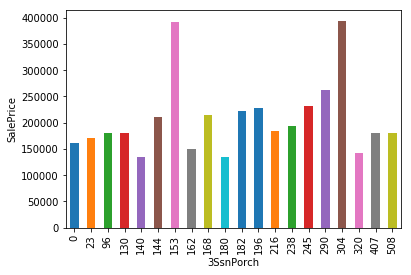

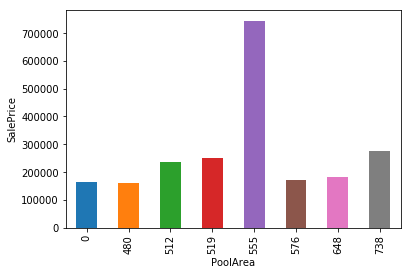

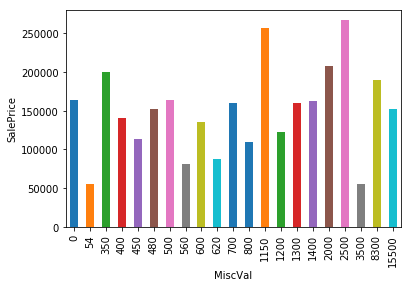

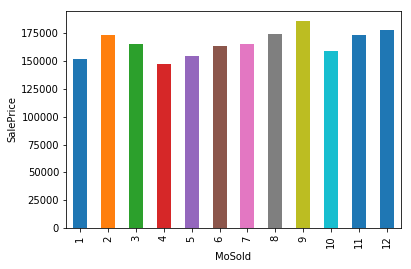

In [16]:
for col in discrete_value:
  data=df.copy()
  data.groupby(col)["SalePrice"].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel("SalePrice")
  plt.show()

In [17]:
continue_values=[col for col in numerical_feature if(col not in discrete_value+year_value+["Id"])]

In [18]:
continue_values

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

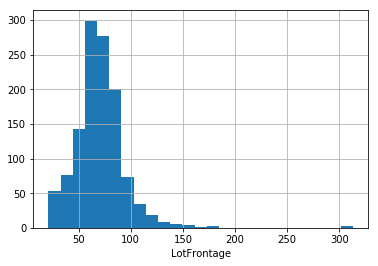

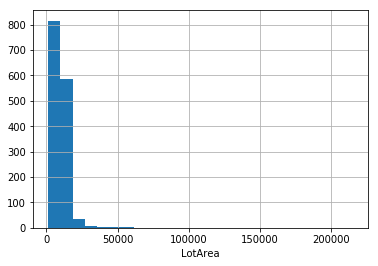

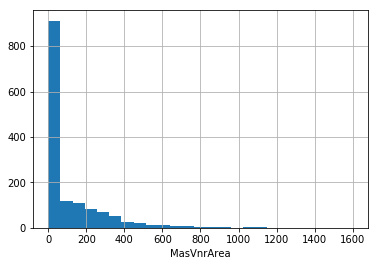

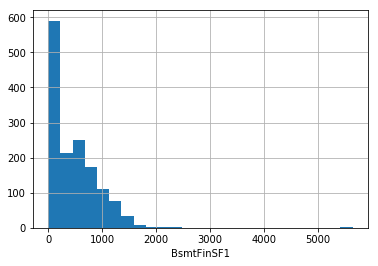

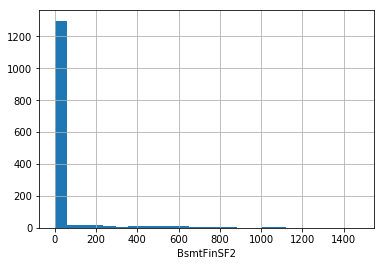

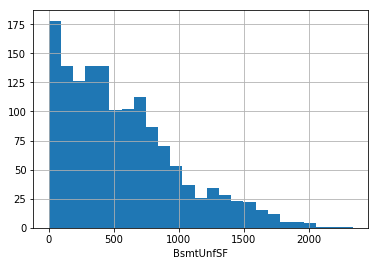

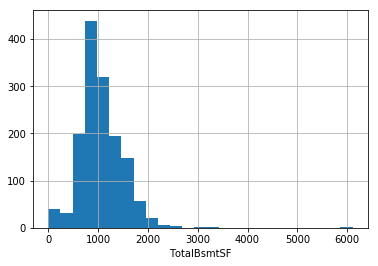

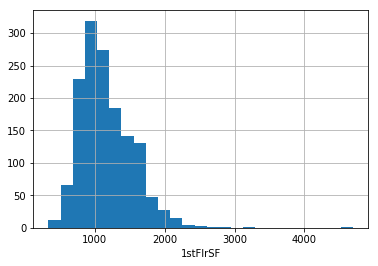

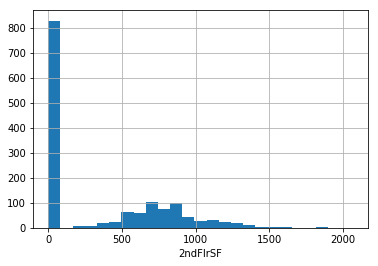

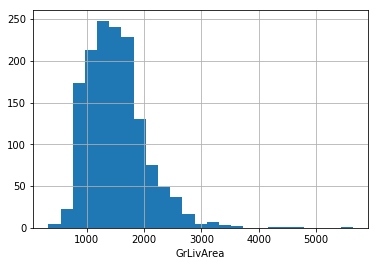

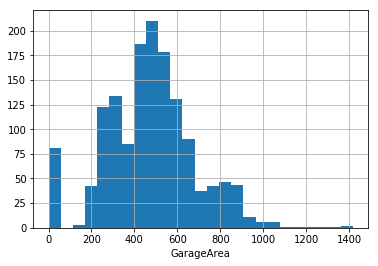

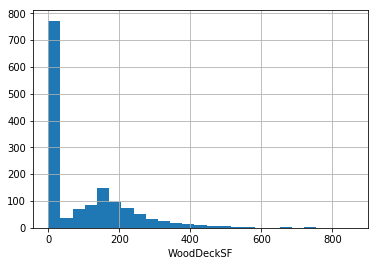

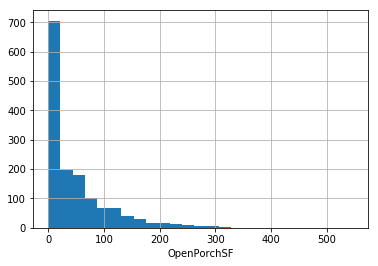

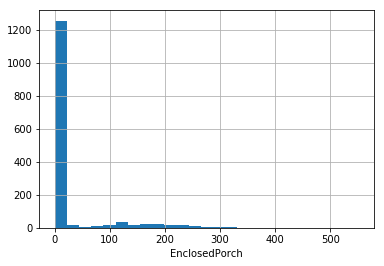

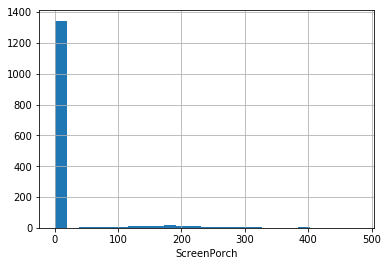

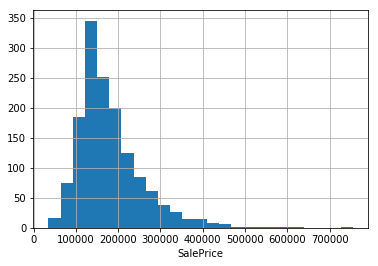

In [19]:
for col in continue_values:
  data=df.copy()
  data[col].hist(bins=25)
  plt.xlabel(col)
  plt.show()

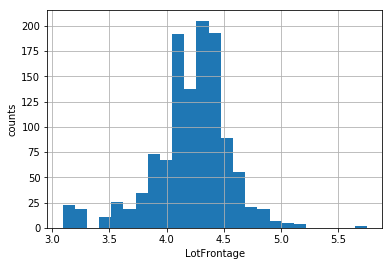

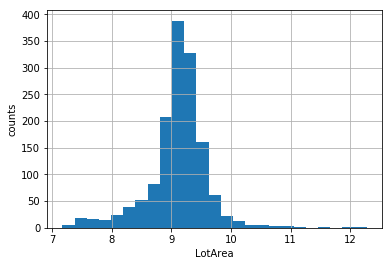

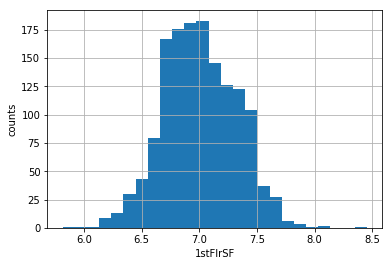

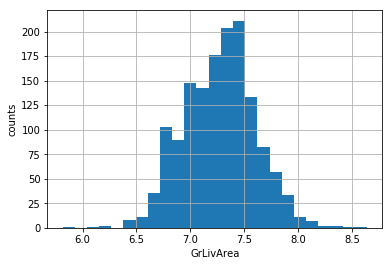

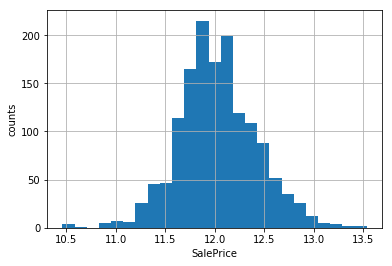

In [20]:
# From Above graph we can see that there is skewness in your data
for col in continue_values:
  data=df.copy()
  if 0 in data[col].unique():
    pass
  else:
    data[col]=np.log1p(data[col])
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

C:\Users\Geetesh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Geetesh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Geetesh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Geetesh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Geetesh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


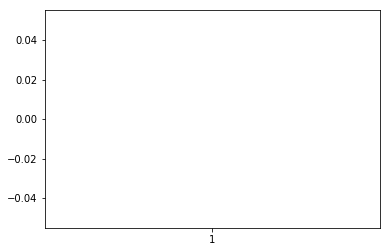

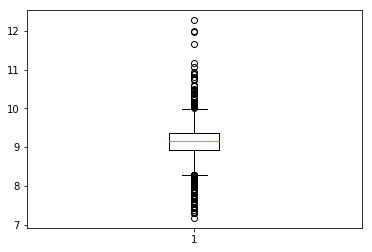

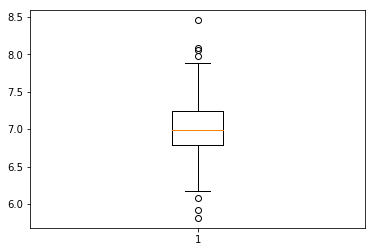

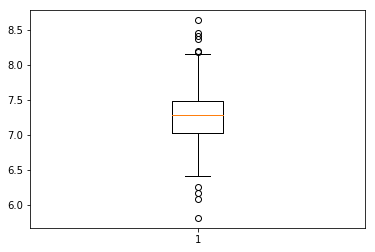

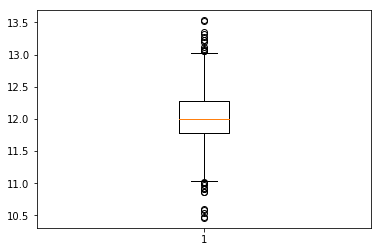

In [21]:
# Now finding the ouliear in the data
for col in continue_values:
  data=df.copy()
  if 0 in data[col].unique():
    pass
  else:
    data[col]=np.log(data[col]+1)
    plt.boxplot(data[col])
    plt.show()

In [22]:
categorical_value=df.select_dtypes(["object"]).columns

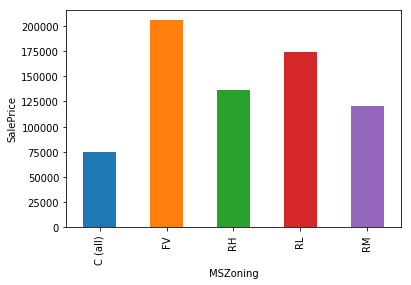

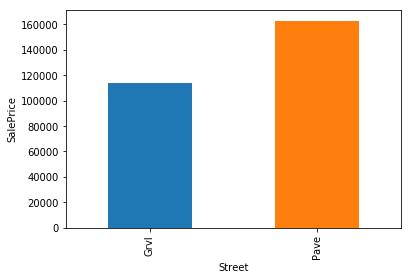

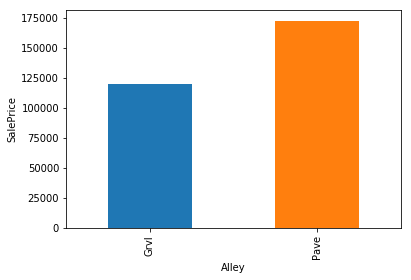

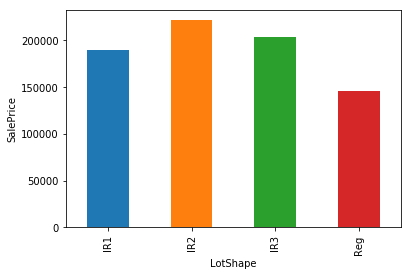

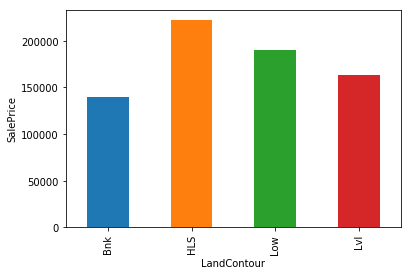

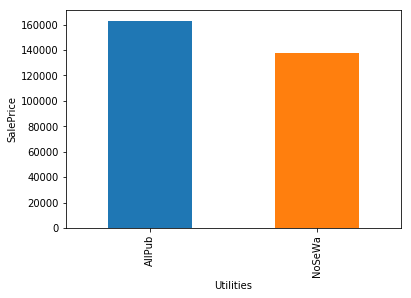

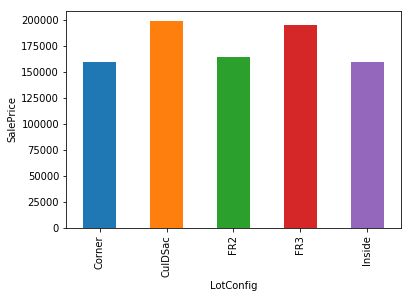

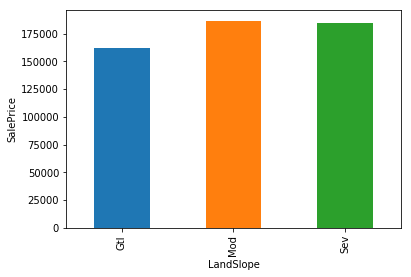

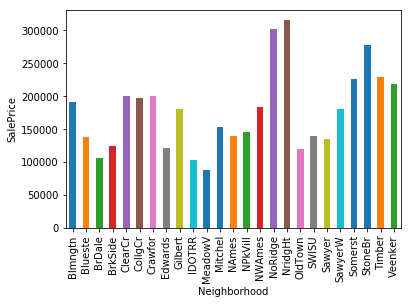

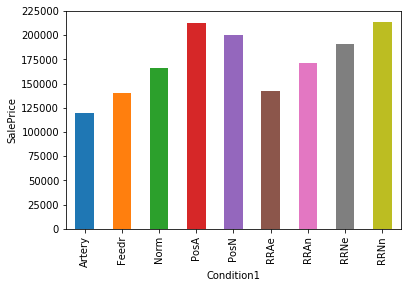

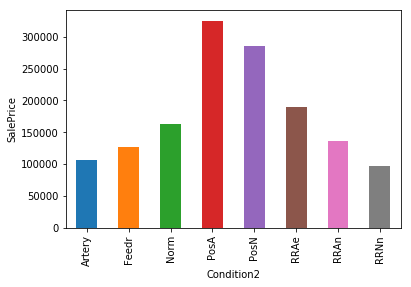

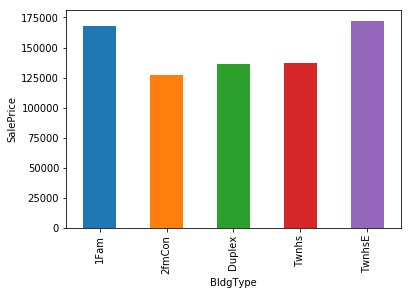

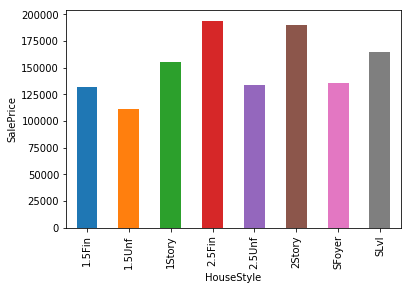

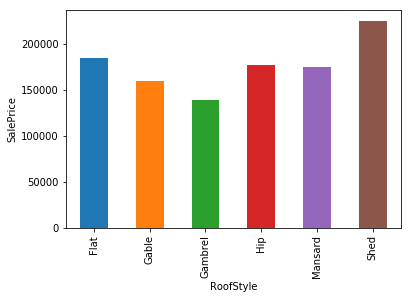

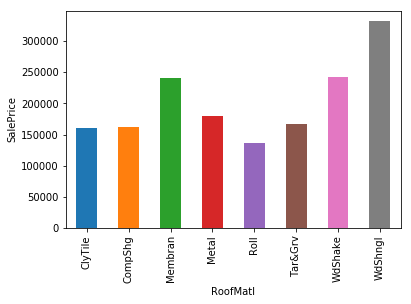

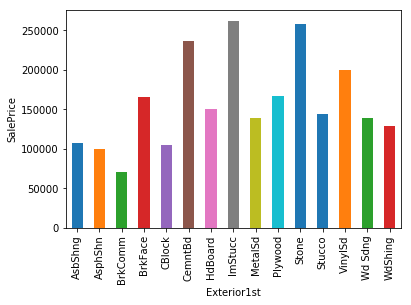

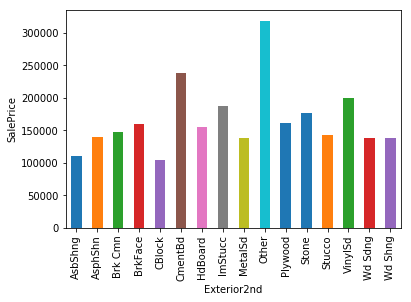

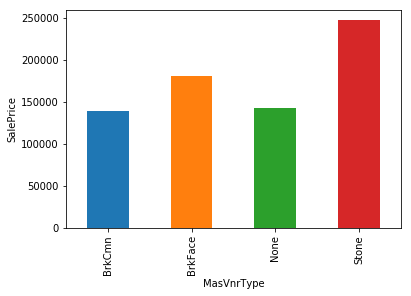

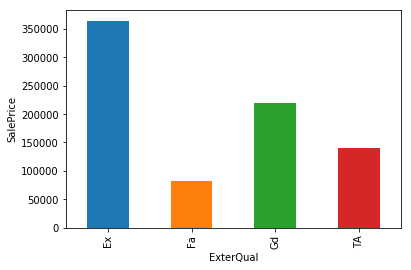

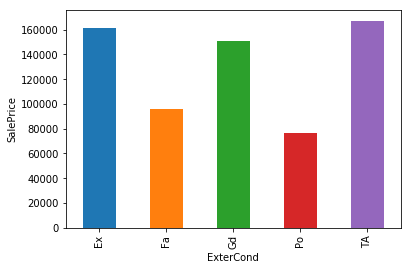

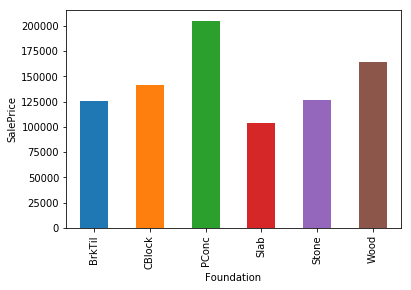

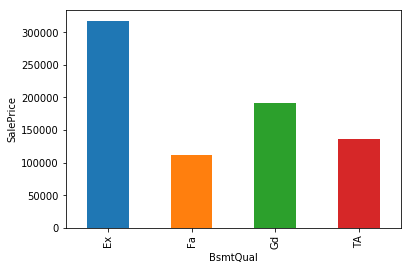

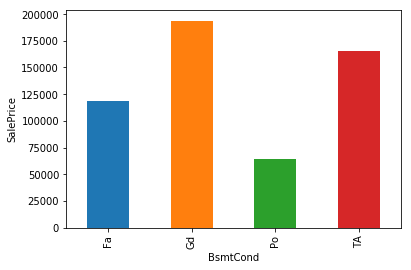

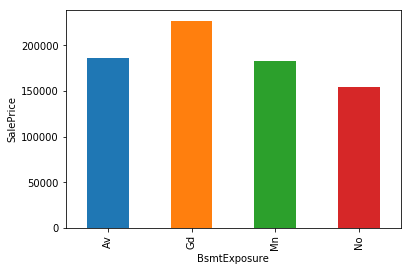

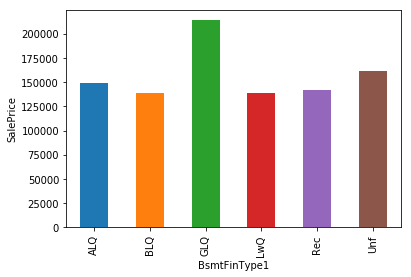

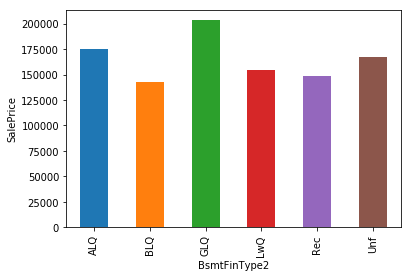

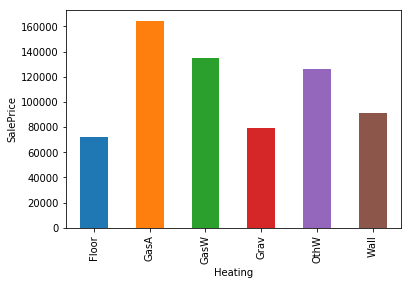

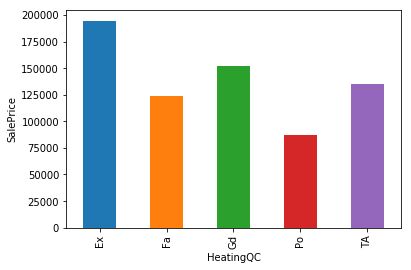

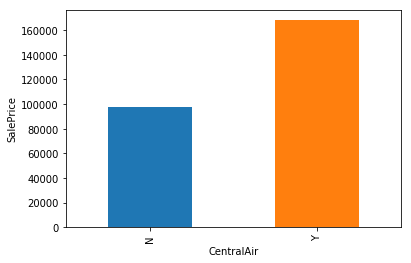

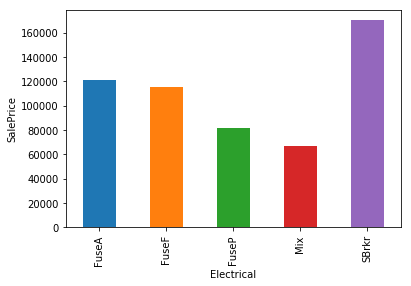

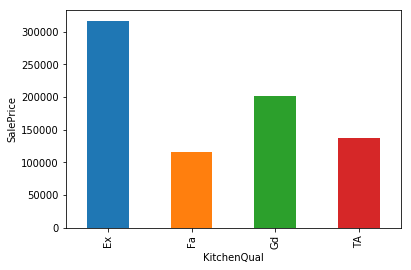

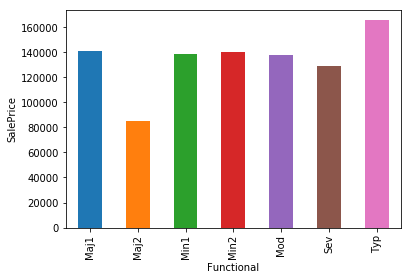

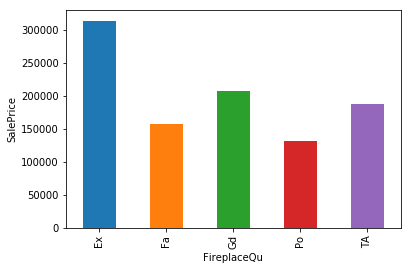

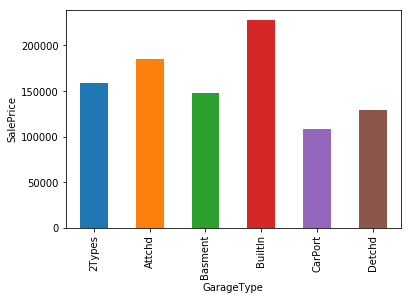

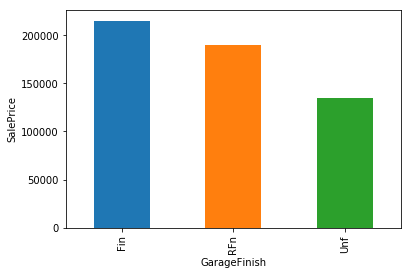

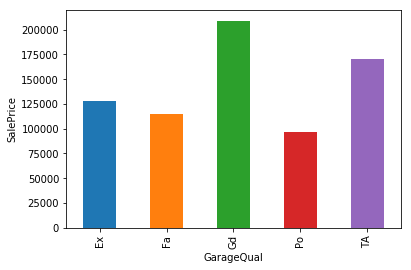

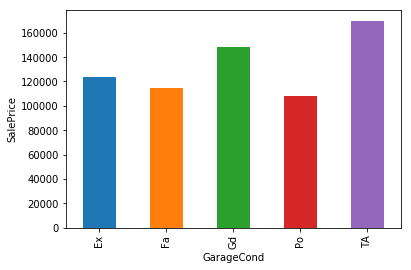

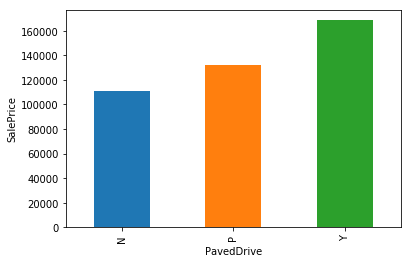

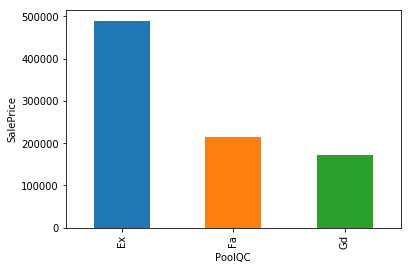

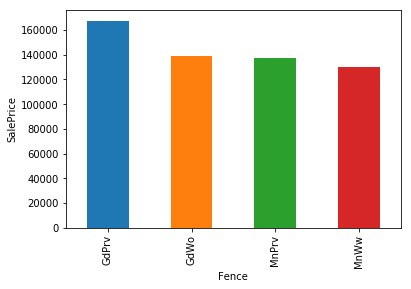

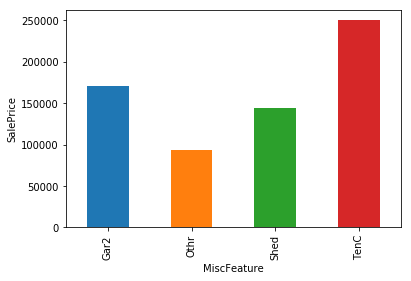

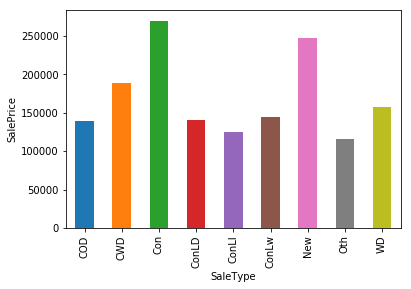

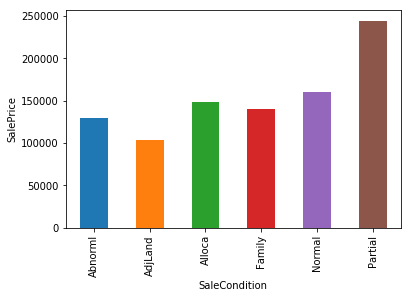

In [23]:
for col in categorical_value:
  data=df.copy()
  data.groupby(col)["SalePrice"].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel("SalePrice")
  plt.show()

In [24]:
for col in categorical_value:
  print("==={}===".format(col))
  print(df[col].value_counts())

===MSZoning===
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
===Street===
Pave    1454
Grvl       6
Name: Street, dtype: int64
===Alley===
Grvl    50
Pave    41
Name: Alley, dtype: int64
===LotShape===
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
===LandContour===
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
===Utilities===
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
===LotConfig===
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
===LandSlope===
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
===Neighborhood===
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneB

In [25]:
for col in categorical_value:

  if(len(df[col].value_counts())==2 and col not in miss_value):
    print("===="+col+"=====")
    print(df[col].value_counts())

====Street=====
Pave    1454
Grvl       6
Name: Street, dtype: int64
====Utilities=====
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
====CentralAir=====
Y    1365
N      95
Name: CentralAir, dtype: int64


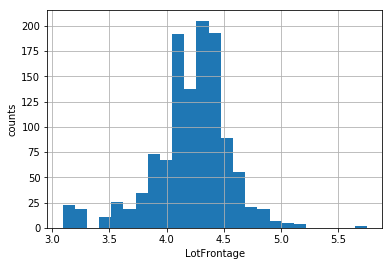

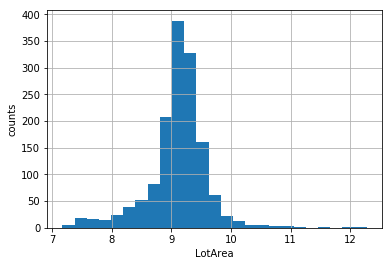

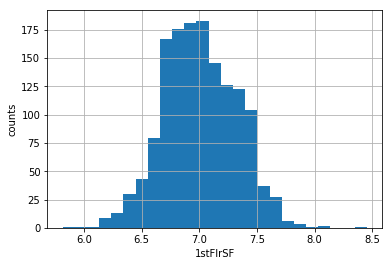

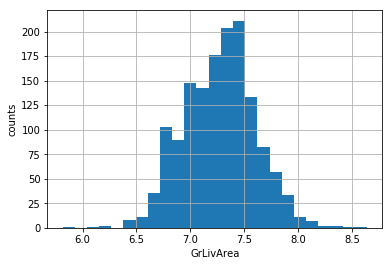

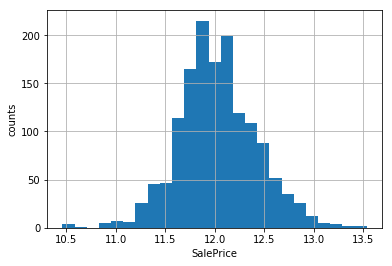

In [26]:
for col in continue_values:
  if 0 in df[col].unique():
    pass
  else:
    df[col]=np.log1p(df[col])
    df[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

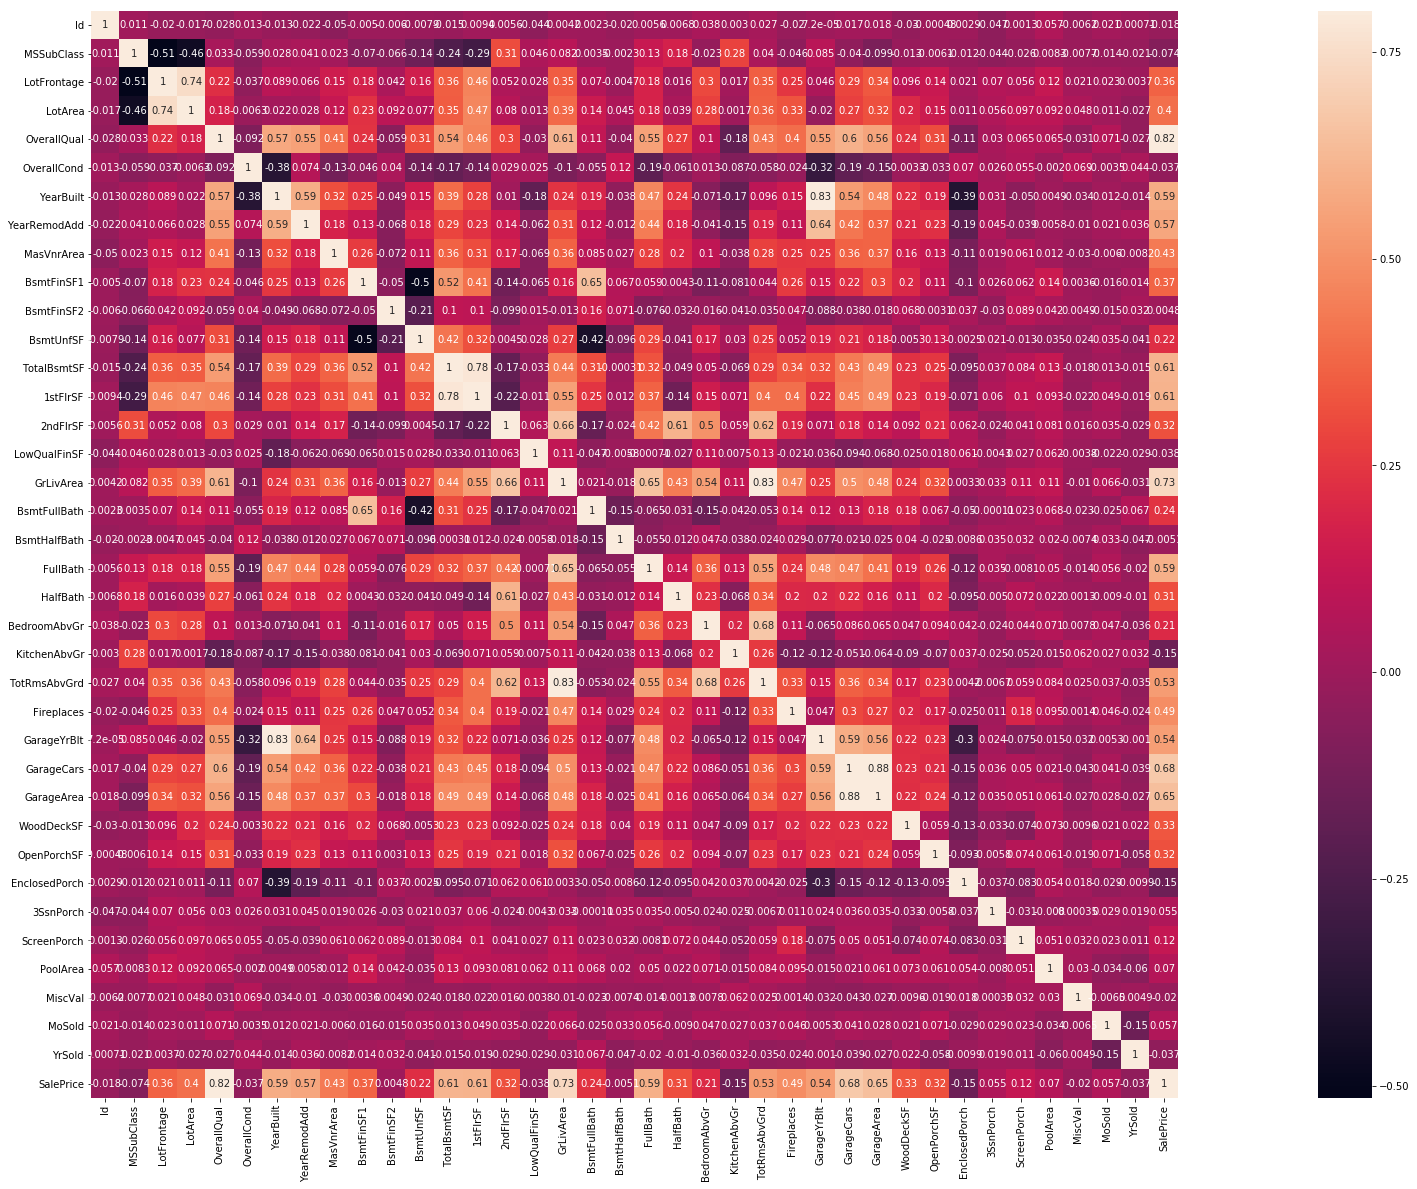

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(50, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True)

In [28]:
df.drop(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF','BsmtFullBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Id'],axis=1,inplace=True)

In [29]:
df["new_Street"]=np.where(df["Street"]=="Pave",1,0)
df["new_Utilities"]=np.where(df["Utilities"]=="AllPub",1,0)
df["new_CentralAir"]=np.where(df["CentralAir"]=="Y",1,0)

In [30]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,new_Street,new_Utilities,new_CentralAir
0,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,61,NaN,NaN,NaN,WD,Normal,12.247699,1,1,1
1,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,WD,Normal,12.109016,1,1,1
2,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,42,NaN,NaN,NaN,WD,Normal,12.317171,1,1,1
3,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,35,NaN,NaN,NaN,WD,Abnorml,11.849405,1,1,1
4,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,84,NaN,NaN,NaN,WD,Normal,12.429220,1,1,1


In [31]:
df.drop(["Street","Utilities","CentralAir"],axis=1,inplace=True)

In [32]:
for col in df.select_dtypes(["object"]).columns:
  dummy= pd.get_dummies(df[col],prefix=col,drop_first=True)
  df=pd.concat([df,dummy],axis=1)
  del df[col]
  print(col)
del dummy

MSZoning
Alley
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [33]:
df.shape

(1460, 233)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train,test= train_test_split(df,test_size=0.2,random_state=10)

In [36]:
train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=233)

In [37]:
for col in train.columns:
  print(col)
  if(train[col].isnull().sum()>1 and (col is not ["SalePrice"])):
    train.loc[train[col].isnull(),col]=train[col].median()  

LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea


C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
SalePrice
new_Street
new_Utilities
new_CentralAir
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
Condition1_Feedr
Condition1_Norm

In [38]:
for col in test.columns:
  print(col)
  if(test[col].isnull().sum()>1 and col not in ["SalePrice"]):
    test.loc[test[col].isnull(),col]= train[col].median()

LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea


C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
SalePrice
new_Street
new_Utilities
new_CentralAir
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
Condition1_Feedr
Condition1_Norm

In [39]:
for col in train.columns:
  print(col,train[col].isnull().sum())

LotFrontage 0
LotArea 0
OverallQual 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
GrLivArea 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
SalePrice 0
new_Street 0
new_Utilities 0
new_CentralAir 0
MSZoning_FV 0
MSZoning_RH 0
MSZoning_RL 0
MSZoning_RM 0
Alley_Pave 0
LotShape_IR2 0
LotShape_IR3 0
LotShape_Reg 0
LandContour_HLS 0
LandContour_Low 0
LandContour_Lvl 0
LotConfig_CulDSac 0
LotConfig_FR2 0
LotConfig_FR3 0
LotConfig_Inside 0
LandSlope_Mod 0
LandSlope_Sev 0
Neighborhood_Blueste 0
Neighborhood_BrDale 0
Neighborhood_BrkSide 0
Neighborhood_ClearCr 0
Neighborhood_CollgCr 0
Neighborhood_Crawfor 0
Neighborhood_Edwards 0
Neighborhood_Gilbert 0
Neighborhood_IDOTRR 0
Neighborhood_MeadowV 0
Neighborhood_Mitchel 0
Neighborhood_NAmes 0
Neighborhood_NPkVill 0
Neighborhood_NWAmes 0
Neighborhood_NoRidge 0
Neighborhood_NridgHt 0
Neighborho

In [40]:
for col in test.columns:
  print(col,test[col].isnull().sum())

LotFrontage 0
LotArea 0
OverallQual 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
GrLivArea 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
SalePrice 0
new_Street 0
new_Utilities 0
new_CentralAir 0
MSZoning_FV 0
MSZoning_RH 0
MSZoning_RL 0
MSZoning_RM 0
Alley_Pave 0
LotShape_IR2 0
LotShape_IR3 0
LotShape_Reg 0
LandContour_HLS 0
LandContour_Low 0
LandContour_Lvl 0
LotConfig_CulDSac 0
LotConfig_FR2 0
LotConfig_FR3 0
LotConfig_Inside 0
LandSlope_Mod 0
LandSlope_Sev 0
Neighborhood_Blueste 0
Neighborhood_BrDale 0
Neighborhood_BrkSide 0
Neighborhood_ClearCr 0
Neighborhood_CollgCr 0
Neighborhood_Crawfor 0
Neighborhood_Edwards 0
Neighborhood_Gilbert 0
Neighborhood_IDOTRR 0
Neighborhood_MeadowV 0
Neighborhood_Mitchel 0
Neighborhood_NAmes 0
Neighborhood_NPkVill 0
Neighborhood_NWAmes 0
Neighborhood_NoRidge 0
Neighborhood_NridgHt 0
Neighborho

In [41]:
x_train=train.drop(["SalePrice"],axis=1)
y_train=train["SalePrice"]
x_test=test.drop(["SalePrice"],axis=1)
y_test=test["SalePrice"]

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm= LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lm.intercept_

-0.2893397099906725

In [46]:
list(zip(x_train.columns,lm.coef_))

[('LotFrontage', 0.021867778338773576),
 ('LotArea', 0.0890235363691978),
 ('OverallQual', 0.0462847725558651),
 ('YearBuilt', 0.001212654999169738),
 ('YearRemodAdd', 0.0017677090741770411),
 ('MasVnrArea', 2.0589409209125463e-05),
 ('BsmtFinSF1', 1.0928021198504216e-05),
 ('BsmtUnfSF', -6.429736608429878e-05),
 ('TotalBsmtSF', 0.00013516286163381581),
 ('1stFlrSF', 0.1420487442293782),
 ('2ndFlrSF', 0.00015262219286870347),
 ('GrLivArea', 0.19091984249655586),
 ('BsmtHalfBath', 0.005735109328948359),
 ('FullBath', -0.003239060187798796),
 ('HalfBath', -0.003722775410868562),
 ('BedroomAbvGr', 0.0007631633818016587),
 ('TotRmsAbvGrd', 0.0011368356218085206),
 ('Fireplaces', 0.008013714039735876),
 ('GarageYrBlt', -0.0004545413854325636),
 ('GarageCars', 0.023644963634017854),
 ('GarageArea', 9.881075392871586e-05),
 ('WoodDeckSF', 0.0001174681991290838),
 ('OpenPorchSF', 5.14667135818013e-05),
 ('new_Street', 0.1002592473070596),
 ('new_Utilities', 0.15568900954122084),
 ('new_Central

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(y_train,lm.predict(x_train))

0.06544440621999177

In [49]:
mean_absolute_error(y_test,lm.predict(x_test))

0.10602179399131334

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,lm.predict(x_test))

0.6722875149480125

In [53]:
pd.DataFrame(list(zip(y_test,lm.predict(x_test))),columns=["Real","Predicted"])

,Real,Predicted
0,12.043560,12.070354
1,12.142872,12.250155
2,11.827744,11.794542
3,12.010672,11.941131
4,12.641100,12.614265
5,12.495008,12.508833
6,12.879020,12.441687
7,11.608245,11.618380
8,12.053801,12.145309
9,12.154521,12.040615


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [55]:
lambdas=np.linspace(0.000199,0.1,100)
paras={"alpha":lambdas}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,cv=10,param_grid=paras,scoring="neg_mean_absolute_error")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.0002 , 0.00121, ..., 0.09899, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [56]:
grid_search.best_estimator_

Lasso(alpha=0.001207090909090909, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
lasso=Lasso(alpha=0.0012,fit_intercept=True) #0.000199 
lasso.fit(x_train,y_train)

Lasso(alpha=0.0012, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso.intercept_

1.75079920856205

In [59]:
lasso_value=pd.DataFrame(list(zip(x_train,lasso.coef_)),columns=["name","value"])

In [60]:
new_df=df[lasso_value[lasso_value["value"]!=0]["name"]]
new_df.shape

(1460, 64)

In [61]:
new_df["SalePrice"]=df["SalePrice"]
new_df.shape

C:\Users\Geetesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1460, 65)

In [62]:
new_df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Functional_Typ,FireplaceQu_Gd,GarageType_Attchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,9.042040,7,2003,2003,196.0,706,150,856,6.753438,854,...,1,0,1,0,1,0,1,1,0,12.247699
1,9.169623,6,1976,1976,0.0,978,284,1262,7.141245,0,...,1,0,1,0,1,0,1,1,0,12.109016
2,9.328212,7,2001,2002,162.0,486,434,920,6.825460,866,...,1,0,1,0,1,0,1,1,0,12.317171
3,9.164401,7,1915,1970,0.0,216,540,756,6.869014,756,...,1,1,0,1,1,0,1,0,0,11.849405
4,9.565284,8,2000,2000,350.0,655,490,1145,7.044033,1053,...,1,0,1,0,1,0,1,1,0,12.429220


In [63]:
train,test=train_test_split(new_df,test_size=0.2,random_state=10)

In [64]:
for col in train.columns:
  print(col)
  if(train[col].isnull().sum()>1 and (col is not ["SalePrice"])):
    train.loc[train[col].isnull(),col]=train[col].median()

LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
TotRmsAbvGrd
Fireplaces
GarageYrBlt


C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
new_CentralAir
MSZoning_FV
MSZoning_RL
LotShape_Reg
LandContour_Lvl
LotConfig_CulDSac
LandSlope_Mod
Neighborhood_BrkSide
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_IDOTRR
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_Somerst
Neighborhood_StoneBr
Condition1_Norm
BldgType_Duplex
HouseStyle_2Story
RoofStyle_Hip
Exterior1st_BrkFace
Exterior1st_MetalSd
Exterior1st_Wd Sdng
MasVnrType_None
ExterQual_TA
ExterCond_Fa
Foundation_PConc
BsmtQual_Gd
BsmtCond_Gd
BsmtCond_TA
BsmtExposure_Gd
BsmtExposure_No
BsmtFinType1_Unf
BsmtFinType2_Unf
HeatingQC_Gd
HeatingQC_TA
KitchenQual_Gd
KitchenQual_TA
Functional_Typ
FireplaceQu_Gd
GarageType_Attchd
GarageFinish_Unf
PavedDrive_Y
SaleType_New
SaleType_WD
SaleCondition_Normal
SaleCondition_Partial
SalePrice


In [65]:
for col in test.columns:
  print(col)
  if(test[col].isnull().sum()>1 and (col is not ["SalePrice"])):
    test.loc[test[col].isnull(),col]=train[col].median()

LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars


C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


GarageArea
WoodDeckSF
OpenPorchSF
new_CentralAir
MSZoning_FV
MSZoning_RL
LotShape_Reg
LandContour_Lvl
LotConfig_CulDSac
LandSlope_Mod
Neighborhood_BrkSide
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_IDOTRR
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_Somerst
Neighborhood_StoneBr
Condition1_Norm
BldgType_Duplex
HouseStyle_2Story
RoofStyle_Hip
Exterior1st_BrkFace
Exterior1st_MetalSd
Exterior1st_Wd Sdng
MasVnrType_None
ExterQual_TA
ExterCond_Fa
Foundation_PConc
BsmtQual_Gd
BsmtCond_Gd
BsmtCond_TA
BsmtExposure_Gd
BsmtExposure_No
BsmtFinType1_Unf
BsmtFinType2_Unf
HeatingQC_Gd
HeatingQC_TA
KitchenQual_Gd
KitchenQual_TA
Functional_Typ
FireplaceQu_Gd
GarageType_Attchd
GarageFinish_Unf
PavedDrive_Y
SaleType_New
SaleType_WD
SaleCondition_Normal
SaleCondition_Partial
SalePrice


In [66]:
x_train=train.drop("SalePrice",axis=1)
y_train=train["SalePrice"]

In [67]:
x_test=test.drop("SalePrice",axis=1)
y_test=test["SalePrice"]

In [68]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lm.intercept_

1.8236369865727475

In [70]:
list(zip(x_train.columns,lm.coef_))

[('LotArea', 0.0819858342228982),
 ('OverallQual', 0.0641787330235548),
 ('YearBuilt', 0.0010270220087091793),
 ('YearRemodAdd', 0.0019688779260802368),
 ('MasVnrArea', -9.65223413505189e-06),
 ('BsmtFinSF1', -6.649926128353867e-05),
 ('BsmtUnfSF', -8.230425121522178e-05),
 ('TotalBsmtSF', 3.465906183885376e-05),
 ('1stFlrSF', 0.18952380749903955),
 ('2ndFlrSF', 0.00012640358130523287),
 ('GrLivArea', 0.2212407002242454),
 ('TotRmsAbvGrd', 0.005920367541411419),
 ('Fireplaces', 0.011270862108106364),
 ('GarageYrBlt', -0.00019126952142183712),
 ('GarageCars', 0.06007928599022182),
 ('GarageArea', -1.645162656400967e-05),
 ('WoodDeckSF', 0.00015526270256410735),
 ('OpenPorchSF', 4.130825104518669e-05),
 ('new_CentralAir', 0.09505658804994224),
 ('MSZoning_FV', 0.05681721059416595),
 ('MSZoning_RL', 0.03172242304176999),
 ('LotShape_Reg', 0.0017847185991501997),
 ('LandContour_Lvl', 0.0431106158503564),
 ('LotConfig_CulDSac', 0.05019065144916612),
 ('LandSlope_Mod', 0.049503038348522446),

In [71]:
mean_absolute_error(y_train,lm.predict(x_train))

0.0820627337570972

In [72]:
mean_absolute_error(y_test,lm.predict(x_test))

0.09697158300668605

In [73]:
r2_score(y_test,lm.predict(x_test))

0.9007062875691559

In [74]:
r2_score(y_train,lm.predict(x_train))

0.9047313028429652

In [75]:
df_test=pd.read_csv(r"C:\Users\Geetesh\Videos\Desktop\project\Data\test.csv")

In [76]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [78]:
miss_value=[col for col in df_test.columns if(df_test[col].isnull().sum()>1)]
print(miss_value)
print(len(miss_value))

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
23


In [79]:
numerical_feature=[]
for col in df_test.columns:
  if(df_test[col].dtypes!="O"):
    numerical_feature.append(col)
print(numerical_feature)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [80]:
year_value=[col for col in numerical_feature if "Yr" in col or "Year" in col]
print(year_value)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [81]:
discrete_value=[col for col in numerical_feature if(len(df_test[col].unique())<25 and col not in year_value)]
print(discrete_value)
print(len(discrete_value))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
16


In [82]:
continue_values=[col for col in numerical_feature if(col not in discrete_value+year_value+["Id"])]

In [83]:
categorical_value=df.select_dtypes(["object"]).columns

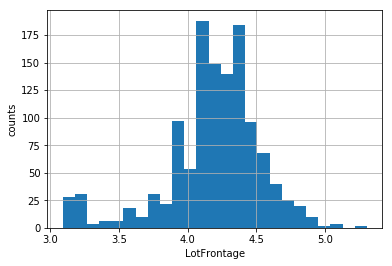

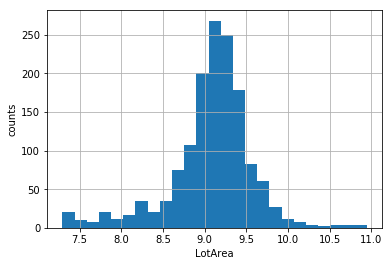

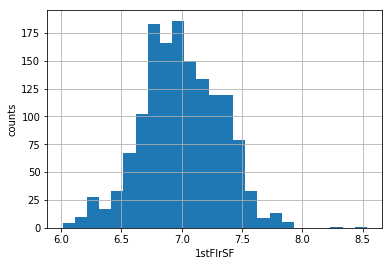

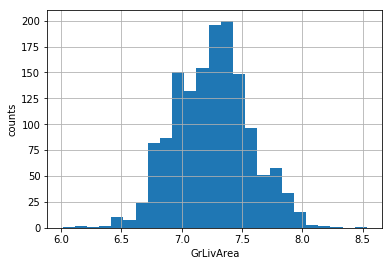

In [84]:
for col in continue_values:
  if 0 in df_test[col].unique():
    pass
  else:
    df_test[col]=np.log1p(df_test[col])
    df_test[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

In [85]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [86]:
Id=df_test["Id"]

In [87]:
df_test.drop(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF','BsmtFullBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Id'],axis=1,inplace=True)

In [88]:
df_test["new_Street"]=np.where(df_test["Street"]=="Pave",1,0)
df_test["new_Utilities"]=np.where(df_test["Utilities"]=="AllPub",1,0)
df_test["new_CentralAir"]=np.where(df_test["CentralAir"]=="Y",1,0)

In [89]:
df_test.drop(["Street","Utilities","CentralAir"],axis=1,inplace=True)

In [90]:
obj_feature=df_test.select_dtypes("object").columns

In [91]:
for col in obj_feature:
  dummy= pd.get_dummies(df_test[col],prefix=col,drop_first=True)
  df_test=pd.concat([df_test,dummy],axis=1)
  del df_test[col]
  print(col)
del dummy

MSZoning
Alley
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [92]:
df_test.shape

(1459, 215)

In [93]:
for col in df_test.columns:
  print(col)
  if(df_test[col].isnull().sum()>1 and (col is not ["SalePrice"])):
    df_test.loc[df_test[col].isnull(),col]=df_test[col].median()

LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
new_Street
new_Utilities
new_CentralAir
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timb

In [94]:
col_val=x_train.columns

In [95]:
data=df_test[col_val].copy()

In [96]:
data.shape

(1459, 64)

In [97]:
data.fillna(data.median(),inplace=True)

In [98]:
pred=lm.predict(data)

In [101]:
submision=pd.DataFrame(list(zip(Id,pred)),columns=["Id","SalePrice"])

In [102]:
submision

,Id,SalePrice
0,1461,11.595641
1,1462,11.958000
2,1463,12.112352
3,1464,12.190556
4,1465,12.217253
5,1466,12.057067
6,1467,12.129108
7,1468,11.987593
8,1469,12.225289
9,1470,11.689956
